In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import os
import re
import pickle
import pandas as pd
import numpy as np
import nltk
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pycountry
import re
import string
from PIL import Image

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
# Load the Twitter data into a pandas DataFrame for Xbox
data = pd.read_csv(r'C:\Users\Dvarim\Desktop\Ivey\Digital Analytics\Assignment 1\XboxTweets.csv')

In [3]:
# Sentiment Analysis with source data (no text cleaning applied, method 1)
def percentage(part, whole):
    return 100 * float(part) / float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in data['Tweet']:
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

noOfTweet = len(tweet_list)

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

print("Sentiment Analysis Results:")
print("Positive tweets: " + str(positive) + "%")
print("Negative tweets: " + str(negative) + "%")
print("Neutral tweets: " + str(neutral) + "%")

Sentiment Analysis Results:
Positive tweets: 45.6%
Negative tweets: 10.2%
Neutral tweets: 44.2%


In [4]:
# Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ", len(tweet_list))
print("positive number: ", len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ", len(neutral_list))

total number:  2025
positive number:  924
negative number:  206
neutral number:  895


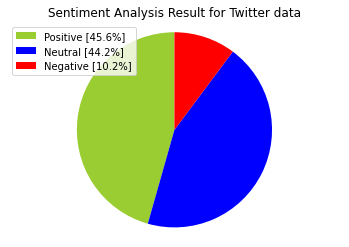

In [5]:
# Creating Pie Chart
labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]', 'Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Twitter data")
plt.axis('equal')
plt.show()

In [6]:
# Cleaning Text (RT, Punctuation, etc.), method 2
# Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

# Removing RT, Punctuation, etc.
remove_rt = lambda x: re.sub(r'RT @\w+: ', '', x)
remove_at_symbol = lambda x: re.sub(r'@\w+\b', '', x)
remove_url = lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x)
remove_non_english = lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x)
remove_unwanted_chars = lambda x: re.sub(r'[\"/.*]', '', x)

tw_list["text"] = tw_list["text"].map(remove_rt).map(remove_at_symbol).map(remove_url).map(remove_non_english).map(remove_unwanted_chars)
tw_list["text"] = tw_list["text"].str.lower()

tw_list.head(10)

,0,text
0,"@Halo @tiktok_us ""Master Chief, mind telling m...",master chief mind telling me what youre doin...
1,@robinbpb It's a huge accomplishment. Only the...,its a huge accomplishment only the most arden...
2,@eduardoleonidas It's Grogorgeous.,its grogorgeous
3,@AmongUsGame @thisishannako https://t.co/7XCvB...,
4,@Pru_Benji Just one good taste haver acknowled...,just one good taste haver acknowledging another
5,@MoRoRadio The baby. https://t.co/j0j8RGzfDs,the baby
6,@Andro_Z That triple bundle is strong with the...,that triple bundle is strong with the force
7,@StefParedis You know it is.,you know it is
8,@Eric_P365 You're going to have so many great ...,youre going to have so many great games to play
9,@Superlink92 Turning that Digital Future into ...,turning that digital future into a digital pr...


In [7]:
# Calculating Negative, Positive, Neutral, and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']Q
    
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"@Halo @tiktok_us ""Master Chief, mind telling m...",master chief mind telling me what youre doin...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
1,@robinbpb It's a huge accomplishment. Only the...,its a huge accomplishment only the most arden...,0.225000,0.725000,positive,0.0,0.490,0.510,0.9099
2,@eduardoleonidas It's Grogorgeous.,its grogorgeous,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
3,@AmongUsGame @thisishannako https://t.co/7XCvB...,,0.000000,0.000000,neutral,0.0,0.000,0.000,0.0000
4,@Pru_Benji Just one good taste haver acknowled...,just one good taste haver acknowledging another,0.700000,0.600000,positive,0.0,0.674,0.326,0.4404
5,@MoRoRadio The baby. https://t.co/j0j8RGzfDs,the baby,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
6,@Andro_Z That triple bundle is strong with the...,that triple bundle is strong with the force,0.433333,0.733333,positive,0.0,0.680,0.320,0.5106
7,@StefParedis You know it is.,you know it is,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
8,@Eric_P365 You're going to have so many great ...,youre going to have so many great games to play,0.650000,0.625000,positive,0.0,0.541,0.459,0.7769
9,@Superlink92 Turning that Digital Future into ...,turning that digital future into a digital pr...,0.000000,0.031250,neutral,0.0,1.000,0.000,0.0000


In [8]:
# Creating new data frames for all sentiments (positive, negative, and neutral)
tw_list_negative = tw_list[tw_list["sentiment"] == "negative"]
tw_list_positive = tw_list[tw_list["sentiment"] == "positive"]
tw_list_neutral = tw_list[tw_list["sentiment"] == "neutral"]

In [9]:
def count_values_in_column(data, feature):
    total = data.loc[:, feature].value_counts(dropna=False)
    percentage = round(data.loc[:, feature].value_counts(dropna=False, normalize=True) * 100, 2)
    return pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])

# Count_values for sentiment
count_values_in_column(tw_list, "sentiment")


,Total,Percentage
positive,947,46.77
neutral,873,43.11
negative,205,10.12


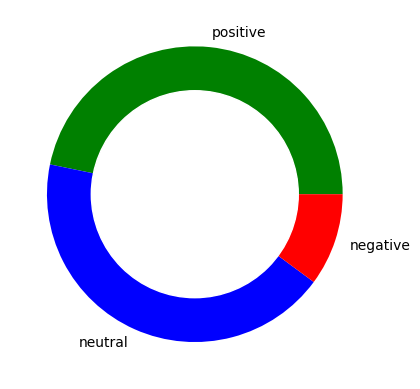

In [10]:
# Create data for Pie Chart for Sentiment Analysis (Method 2)
pichart = count_values_in_column(tw_list, "sentiment")
names = pichart.index
size = pichart["Percentage"]

# Create a circle for the center of the plot
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green', 'blue', 'red'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
#Sentiment analysis, method 3

def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

sentiments = []
for tweet in tw_list['text']:
    sentiment = analyze_sentiment(tweet)
    sentiments.append(sentiment)

# Create a DataFrame with the sentiments
df = pd.DataFrame({'Sentiment': sentiments})

# Calculate counts and percentages by sentiment category
counts = df['Sentiment'].value_counts()
percentages = df['Sentiment'].value_counts(normalize=True) * 100

# Create a table with the counts and percentages
table = pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Print the table
print(table)

# Print the summaries
print("Total Counts:")
print(counts)
print("\nPercentage by Category:")
print(percentages)

          Count  Percentage
Neutral     939   46.370370
Positive    885   43.703704
Negative    201    9.925926
Total Counts:
Neutral     939
Positive    885
Negative    201
Name: Sentiment, dtype: int64

Percentage by Category:
Neutral     46.370370
Positive    43.703704
Negative     9.925926
Name: Sentiment, dtype: float64


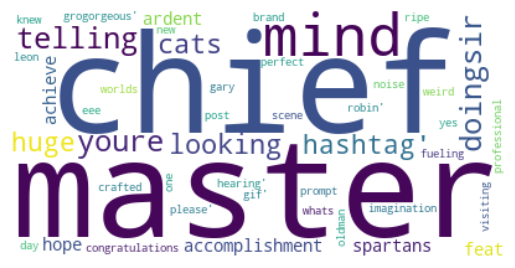

In [13]:
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", max_words=3000, stopwords=stopwords)
    wc.generate(str(text))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

create_wordcloud(tw_list["text"].values)

In [17]:
# Load the Twitter data into a pandas DataFrame for Playstation
data = pd.read_csv(r'C:\Users\Dvarim\Desktop\Ivey\Digital Analytics\Assignment 1\PSTweets.csv')

In [18]:
# Sentiment Analysis with source data (no text cleaning applied, method 1)
def percentage(part, whole):
    return 100 * float(part) / float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in data['Tweet']:
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

noOfTweet = len(tweet_list)

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

print("Sentiment Analysis Results:")
print("Positive tweets: " + str(positive) + "%")
print("Negative tweets: " + str(negative) + "%")
print("Neutral tweets: " + str(neutral) + "%")

Sentiment Analysis Results:
Positive tweets: 50.3%
Negative tweets: 25.3%
Neutral tweets: 24.4%


In [19]:
# Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ", len(tweet_list))
print("positive number: ", len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ", len(neutral_list))

total number:  2440
positive number:  1228
negative number:  617
neutral number:  595


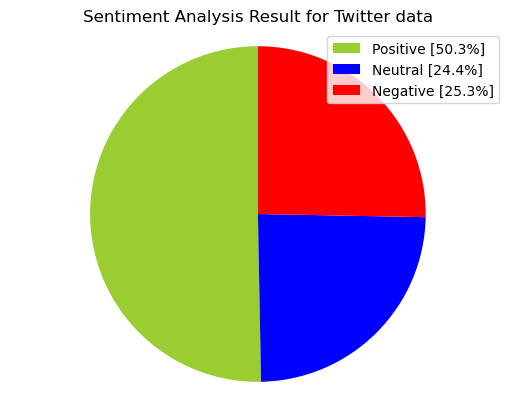

In [20]:
# Creating Pie Chart
labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]', 'Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Twitter data")
plt.axis('equal')
plt.show()

In [21]:
# Cleaning Text (RT, Punctuation, etc.), method 2
# Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

# Removing RT, Punctuation, etc.
remove_rt = lambda x: re.sub(r'RT @\w+: ', '', x)
remove_at_symbol = lambda x: re.sub(r'@\w+\b', '', x)
remove_url = lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x)
remove_non_english = lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x)
remove_unwanted_chars = lambda x: re.sub(r'[\"/.*]', '', x)

tw_list["text"] = tw_list["text"].map(remove_rt).map(remove_at_symbol).map(remove_url).map(remove_non_english).map(remove_unwanted_chars)
tw_list["text"] = tw_list["text"].str.lower()

tw_list.head(10)

,0,text
0,Step into a land overcome by chaos and destruc...,step into a land overcome by chaos and destruc...
1,Weave destruction in Destiny 2: Lightfall with...,weave destruction in destiny 2 lightfall with ...
2,Give Final Fantasy VII Remake’s Seventh Heaven...,give final fantasy vii remakes seventh heaven ...
3,Left Behind gives a poetic peek into Ellie's p...,left behind gives a poetic peek into ellies pa...
4,Take your Kung Fu skills to the next level wit...,take your kung fu skills to the next level wit...
5,Players indulge in a symphony of the senses in...,players indulge in a symphony of the senses in...
6,Your first shift in The Last Worker begins Mar...,your first shift in the last worker begins mar...
7,"New skill cards revealed for Dead Island 2, pl...",new skill cards revealed for dead island 2 plu...
8,Jack Krauser returns in Resident Evil 4 remake...,jack krauser returns in resident evil 4 remake...
9,New to PS5? Other players recommend some must-...,new to ps5 other players recommend some mustse...


In [23]:
# Calculating Negative, Positive, Neutral, and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Step into a land overcome by chaos and destruc...,step into a land overcome by chaos and destruc...,-0.050000,0.400000,negative,0.292,0.708,0.000,-0.7351
1,Weave destruction in Destiny 2: Lightfall with...,weave destruction in destiny 2 lightfall with ...,0.218182,0.727273,negative,0.190,0.667,0.144,-0.2263
2,Give Final Fantasy VII Remake’s Seventh Heaven...,give final fantasy vii remakes seventh heaven ...,0.284091,0.625000,positive,0.000,0.829,0.171,0.5106
3,Left Behind gives a poetic peek into Ellie's p...,left behind gives a poetic peek into ellies pa...,-0.068750,0.425000,neutral,0.000,1.000,0.000,0.0000
4,Take your Kung Fu skills to the next level wit...,take your kung fu skills to the next level wit...,0.068182,0.227273,negative,0.176,0.824,0.000,-0.6908
5,Players indulge in a symphony of the senses in...,players indulge in a symphony of the senses in...,1.000000,0.300000,positive,0.000,0.601,0.399,0.9460
6,Your first shift in The Last Worker begins Mar...,your first shift in the last worker begins mar...,-0.050000,0.266667,neutral,0.000,1.000,0.000,0.0000
7,"New skill cards revealed for Dead Island 2, pl...",new skill cards revealed for dead island 2 plu...,-0.031818,0.427273,negative,0.212,0.788,0.000,-0.6486
8,Jack Krauser returns in Resident Evil 4 remake...,jack krauser returns in resident evil 4 remake...,-0.121212,0.651515,negative,0.180,0.820,0.000,-0.6597
9,New to PS5? Other players recommend some must-...,new to ps5 other players recommend some mustse...,0.377841,0.407386,positive,0.000,0.679,0.321,0.8176


In [24]:
# Creating new data frames for all sentiments (positive, negative, and neutral)
tw_list_negative = tw_list[tw_list["sentiment"] == "negative"]
tw_list_positive = tw_list[tw_list["sentiment"] == "positive"]
tw_list_neutral = tw_list[tw_list["sentiment"] == "neutral"]

In [25]:
def count_values_in_column(data, feature):
    total = data.loc[:, feature].value_counts(dropna=False)
    percentage = round(data.loc[:, feature].value_counts(dropna=False, normalize=True) * 100, 2)
    return pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])

# Count_values for sentiment
count_values_in_column(tw_list, "sentiment")


,Total,Percentage
positive,1239,50.78
negative,611,25.04
neutral,590,24.18


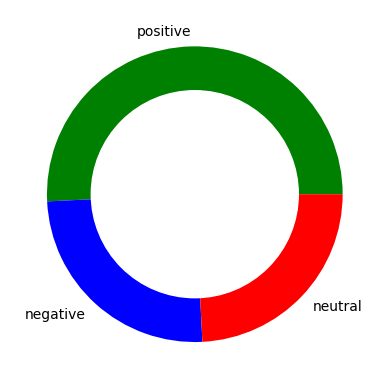

In [26]:
# Create data for Pie Chart for Sentiment Analysis (Method 2)
pichart = count_values_in_column(tw_list, "sentiment")
names = pichart.index
size = pichart["Percentage"]

# Create a circle for the center of the plot
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green', 'blue', 'red'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [27]:
#Sentiment analysis, method 3

def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

sentiments = []
for tweet in tw_list['text']:
    sentiment = analyze_sentiment(tweet)
    sentiments.append(sentiment)

# Create a DataFrame with the sentiments
df = pd.DataFrame({'Sentiment': sentiments})

# Calculate counts and percentages by sentiment category
counts = df['Sentiment'].value_counts()
percentages = df['Sentiment'].value_counts(normalize=True) * 100

# Create a table with the counts and percentages
table = pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Print the table
print(table)

# Print the summaries
print("Total Counts:")
print(counts)
print("\nPercentage by Category:")
print(percentages)

          Count  Percentage
Positive   1527   62.581967
Neutral     575   23.565574
Negative    338   13.852459
Total Counts:
Positive    1527
Neutral      575
Negative     338
Name: Sentiment, dtype: int64

Percentage by Category:
Positive    62.581967
Neutral     23.565574
Negative    13.852459
Name: Sentiment, dtype: float64


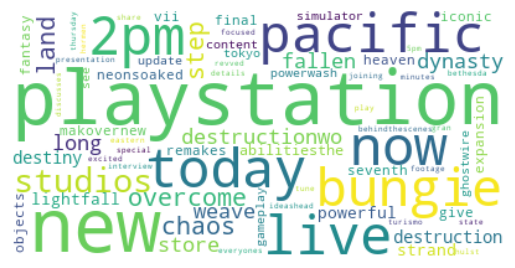

In [29]:
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", max_words=3000, stopwords=stopwords)
    wc.generate(str(text))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

create_wordcloud(tw_list["text"].values)

Conclusions:

After applying 3 different methods for sentiment analysis and comparing two brands, the following was indetified.

1). Xbox-related tweets are heavily inclined towards mentioning Spartans and Halo series of video games where Master Chief is a key character.

2). Playstation-related tweets don't have a certain patterns and mainly cover a large variety of games (Resident Evil, Final Fantasy) etc.

3). Based on the actual results, I would recommend using method #3 (after removing @ of brands and users, additional characters and non-Enlish words) to calculate more accurately polarity and subjectivity scores and then categorize scores based on the types of sentiments more precisely.


4). Xbox may want to consider an option of growing a fan base on Twitter for other games in series (such as Gears of Wars as an example) to increase user engagement and change a sentiment about its games on Twitter 
